<a href="https://colab.research.google.com/github/chandrajitpal/Cybersecurity/blob/main/cyberlabs/cyberlabs_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK 1**

**Part 1: Supervised Regression - Linear Regression (Approx. 40 Mins)**

**Goal:** Predict a continuous number. We will build a model to predict the number of cyber attacks based on the number of remote employees.



--- Part 1: Linear Regression ---
Model training complete.
Calculated Intercept (β₀): 3.29
Calculated Slope (β₁): 0.11
Our model is: Attacks = 3.29 + 0.11 * (Remote Employees)

Prediction for 320 employees: 37 attacks


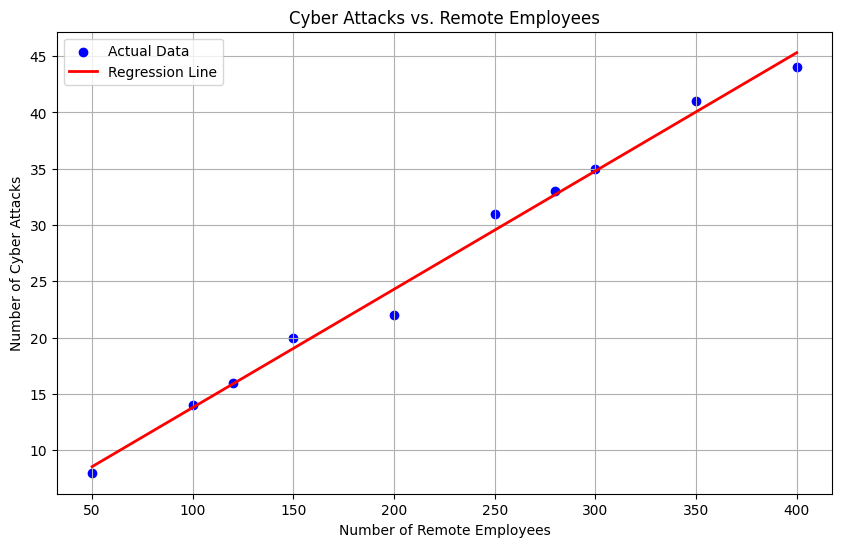

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

print("--- Part 1: Linear Regression ---")

# --- 1. Create the Sample Data ---
# X = number of remote employees (our "feature")
# y = number of cyber attacks (our "target")
# We must reshape X to be a 2D array for scikit-learn
X = np.array([50, 100, 120, 150, 200, 250, 280, 300, 350, 400]).reshape(-1, 1)
y = np.array([8, 14, 16, 20, 22, 31, 33, 35, 41, 44])

# --- 2. Create and Train the Model ---
# Create a Linear Regression model object
model = LinearRegression()

# Train the model (this is where it finds the best-fit line)
model.fit(X, y)

print("Model training complete.")

# --- 3. Get the Betas (Coefficients) ---
# beta_0 is the Y-Intercept (baseline number of attacks)
beta_0 = model.intercept_

# beta_1 is the Slope (how many more attacks per remote employee)
beta_1 = model.coef_[0]

print(f"Calculated Intercept (β₀): {beta_0:.2f}")
print(f"Calculated Slope (β₁): {beta_1:.2f}")
print(f"Our model is: Attacks = {beta_0:.2f} + {beta_1:.2f} * (Remote Employees)")

# --- 4. Make a Prediction ---
# Let's predict the number of attacks if 320 employees work remotely
# We use .predict() and give it a 2D array
prediction = model.predict([[320]])
print(f"\nPrediction for 320 employees: {prediction[0]:.0f} attacks")

# --- 5. Visualize the Result ---
plt.figure(figsize=(10, 6))
# Plot the original data points
plt.scatter(X, y, color='blue', label='Actual Data')
# Plot the regression line our model found
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Cyber Attacks vs. Remote Employees')
plt.xlabel('Number of Remote Employees')
plt.ylabel('Number of Cyber Attacks')
plt.legend()
plt.grid(True)
plt.show()



**Part 2: Supervised Classification - The Perceptron (Approx. 40 Mins)**


**Goal:** Classify data into two groups. We will build a "yes" or "no" classifier to detect malicious URLs.


*   Benign (0)
*   Malicious (1)






--- Part 2: The Perceptron ---
Model training complete!
Model Accuracy on training data: 50.00%

Prediction for [40, 6]: Malicious (1)
Prediction for [22, 1]: Malicious (1)
Displaying decision boundary plot...


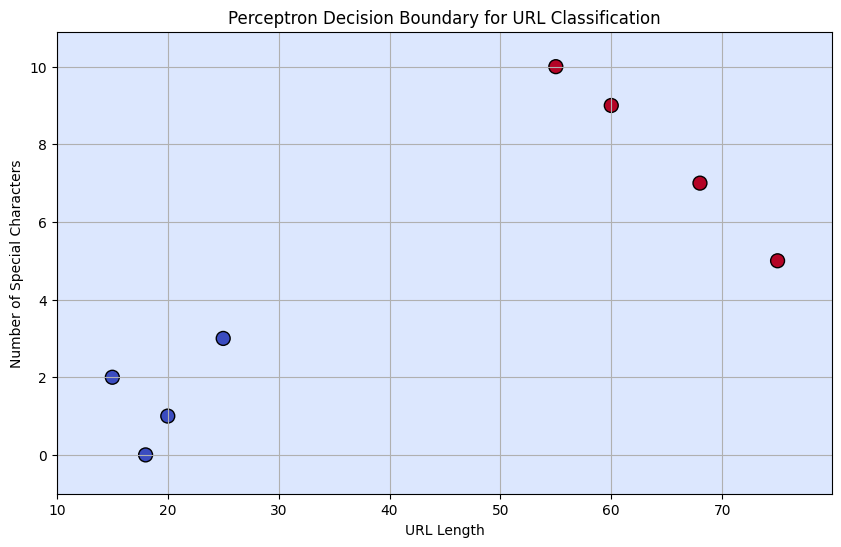

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

print("\n--- Part 2: The Perceptron ---")

# --- 1. Create the Cybersecurity Data ---
# Features: https://stackoverflow.com/questions/43226524/how-to-count-text-length-with-special-characters
X_urls = np.array([
    [15, 2], [20, 1], [18, 0], [25, 3],  # Benign URLs (short, few special chars)
    [60, 9], [75, 5], [55, 10], [68, 7]   # Malicious URLs (long, many special chars)
])

# Labels: 0 for Benign, 1 for Malicious
y_urls = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# --- 2. Create and Train the Perceptron Model ---
# We fit the model to our training data to learn the decision boundary.
# max_iter is the number of passes over the training data.
# eta0 is the learning rate.
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=1)
perceptron.fit(X_urls, y_urls)
print("Model training complete!")

# --- 3. Evaluate the Model ---
# Make predictions on the *same* data to see if it learned.
y_pred = perceptron.predict(X_urls)
accuracy = accuracy_score(y_urls, y_pred)
print(f"Model Accuracy on training data: {accuracy * 100:.2f}%")

# --- 4. Make a Prediction ---
# Let's test a new URL: Length = 40, Special Chars = 6
new_url = [[40, 6]]
prediction = perceptron.predict(new_url)
result = "Malicious (1)" if prediction[0] == 1 else "Benign (0)"
print(f"\nPrediction for [40, 6]: {result}")

# Let's test another: Length = 22, Special Chars = 1
new_url_2 = [[22, 1]]
prediction_2 = perceptron.predict(new_url_2)
result_2 = "Malicious (1)" if prediction_2[0] == 1 else "Benign (0)"
print(f"Prediction for [22, 1]: {result_2}")

# --- 5. Visualize the Decision Boundary ---
# This code generates a plot to show the line the Perceptron "drew"
print("Displaying decision boundary plot...")
x_min, x_max = X_urls[:, 0].min() - 5, X_urls[:, 0].max() + 5
y_min, y_max = X_urls[:, 1].min() - 1, X_urls[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_urls[:, 0], X_urls[:, 1], c=y_urls, edgecolor='k', s=100, cmap=plt.cm.coolwarm)
plt.title('Perceptron Decision Boundary for URL Classification')
plt.xlabel('URL Length')
plt.ylabel('Number of Special Characters')
plt.grid(True)
plt.show()



**Part 3: Unsupervised Learning - PCA (Approx. 40 Mins)**

**Goal:** Simplify complex data to find anomalies. We have network data with 10 features, which we can't plot. We will use PCA to reduce it to 2 features (PC1 and PC2) so we can see the data's structure and find outliers.


--- Part 3: PCA for Anomaly Detection ---
Data scaled.
PCA complete. 10 features reduced to 2.
Displaying PCA plot...


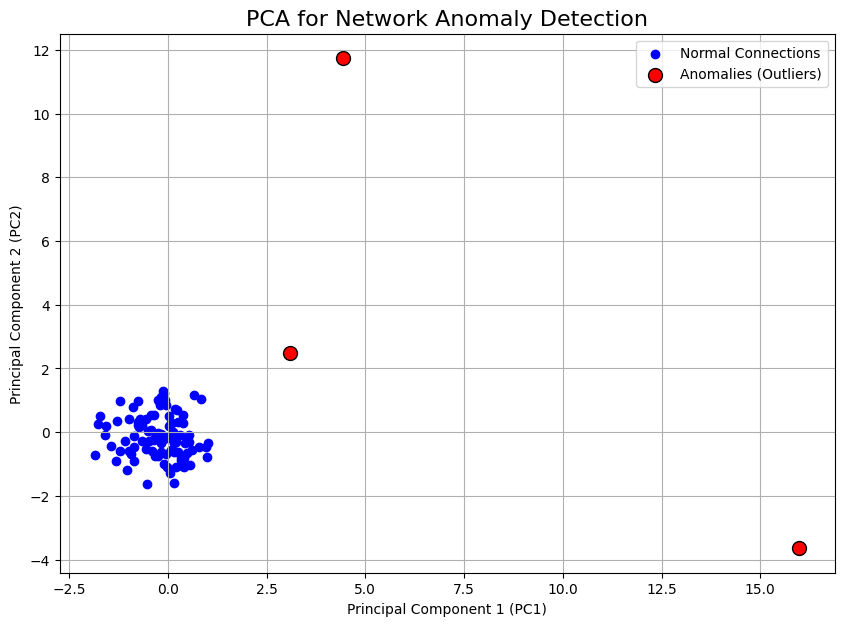


Notice how the 'Anomalies' are far away from the 'Normal' cluster.
This is how PCA helps us find outliers!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("\n--- Part 3: PCA for Anomaly Detection ---")

# --- 1. Generate Simulated Data ---
# We create 100 "normal" connections with 10 features each
normal_connections = np.random.rand(100, 10) * 5

# We create 3 "anomaly" connections that are very different
anomalies = np.array([
    [15, 12, 1, 18, 20, 1, 1, 15, 17, 19],
    [1, 1, 16, 1, 18, 14, 1, 13, 1, 1],
    [18, 1, 1, 1, 1, 19, 16, 1, 17, 1]
])

# Combine them into one dataset
full_data = np.vstack([normal_connections, anomalies])

# --- 2. Scale the Data ---
# PCA is affected by scale, so we MUST scale all features to have
# a similar range. This is a critical step.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_data)
print("Data scaled.")

# --- 3. Apply PCA ---
# We tell PCA to reduce our 10 features down to just 2.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print("PCA complete. 10 features reduced to 2.")

# --- 4. Visualize the Results ---
# Now we can plot our new 2-feature dataset
print("Displaying PCA plot...")
plt.figure(figsize=(10, 7))

# Plot the normal connections (the first 100 points) in blue
# principal_components[:100, 0] is PC1 for the normal data
# principal_components[:100, 1] is PC2 for the normal data
plt.scatter(principal_components[:100, 0], principal_components[:100, 1], c='blue', label='Normal Connections')

# Plot the anomalies (the last 3 points) in red
plt.scatter(principal_components[100:, 0], principal_components[100:, 1], c='red', s=100, edgecolor='k', label='Anomalies (Outliers)')

plt.title('PCA for Network Anomaly Detection', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

print("\nNotice how the 'Anomalies' are far away from the 'Normal' cluster.")
print("This is how PCA helps us find outliers!")



#**WEEK 2**

**Lab 1: Support Vector Machine (SVM) for Intrusion Detection**

**🤖 Intro**
Today, we're going to build a basic threat detector. We'll teach a machine learning model called a Support Vector Machine (SVM) to tell the difference between "normal" and "malicious" network traffic.

Imagine you have a map with blue dots and red dots. An SVM's job is to draw the best possible straight line (called a hyperplane) to separate the blue dots from the red dots. Once the line is drawn, if a new dot appears on the map, the SVM can instantly tell you if it's red or blue based on which side of the line it falls on.

--- Lab Start: Preparing Data ---


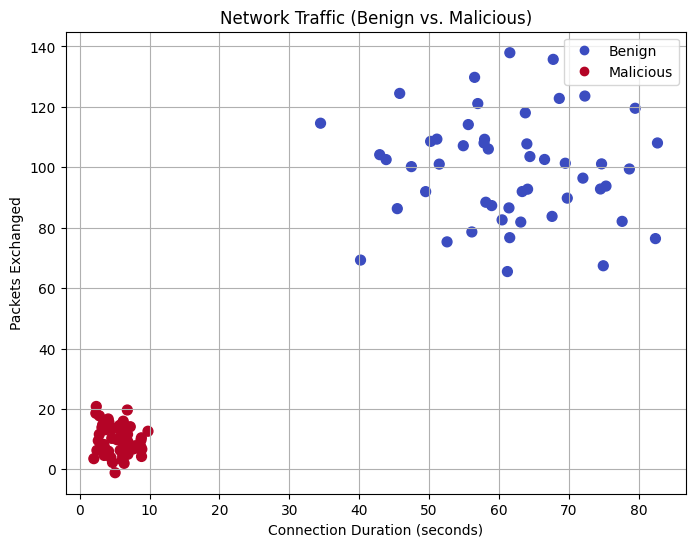


--- Training the SVM Model ---
Model training is complete.

--- Testing the Model's Accuracy ---
Model Accuracy: 100.00%

--- Visualizing the Decision Boundary ---


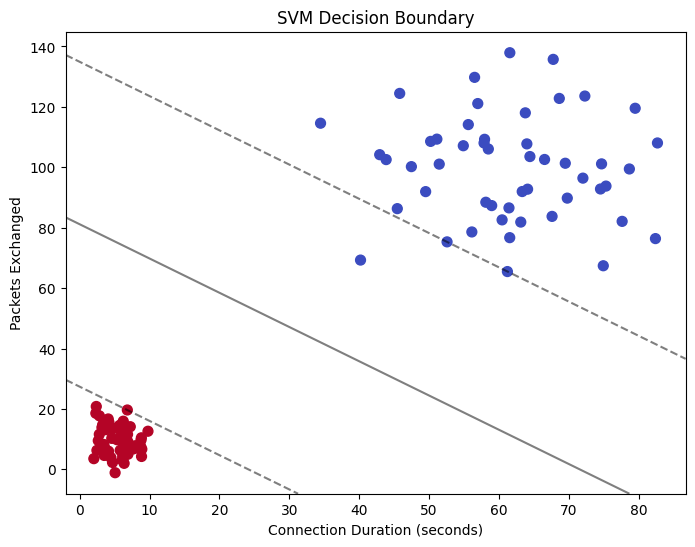

In [ ]:
# Simple Cybersecurity Lab: Using SVM to Detect Malicious Traffic

# --- Step 1: Import Libraries & Create Data ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("--- Lab Start: Preparing Data ---")

# We'll create a simple dataset with two features:
# Feature 1: 'connection_duration' (in seconds)
# Feature 2: 'packets_exchanged'
#
# Malicious traffic (Class 1) = short duration, few packets (like a scan)
# Benign traffic (Class 0) = longer duration, more packets (like browsing)

# Create Benign Traffic (Class 0)
np.random.seed(0) # for consistent results
benign_duration = np.random.normal(loc=60, scale=10, size=50)
benign_packets = np.random.normal(loc=100, scale=20, size=50)
benign_traffic = np.vstack((benign_duration, benign_packets)).T
benign_labels = np.zeros(50)

# Create Malicious Traffic (Class 1)
malicious_duration = np.random.normal(loc=5, scale=2, size=50)
malicious_packets = np.random.normal(loc=10, scale=5, size=50)
malicious_traffic = np.vstack((malicious_duration, malicious_packets)).T
malicious_labels = np.ones(50)

# Combine into a single dataset
X = np.vstack((benign_traffic, malicious_traffic))
y = np.hstack((benign_labels, malicious_labels))

# --- Step 2: Visualize the Data ---
# Let's see what our two classes of traffic look like.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)
plt.title('Network Traffic (Benign vs. Malicious)')
plt.xlabel('Connection Duration (seconds)')
plt.ylabel('Packets Exchanged')
plt.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malicious'])
plt.grid(True)
plt.show()


# --- Step 3: Train the SVM Model ---
print("\n--- Training the SVM Model ---")
# Split the data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a simple SVM classifier with a linear kernel (it will find a straight line)
clf = svm.SVC(kernel='linear')

# Train the model using our training data
clf.fit(X_train, y_train)
print("Model training is complete.")


# --- Step 4: Test the Model ---
print("\n--- Testing the Model's Accuracy ---")
# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Check how many it got right
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


# --- Step 5: Visualize the Decision Boundary ---
# Let's draw the line the SVM learned to separate the classes.
print("\n--- Visualizing the Decision Boundary ---")
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)

# Create a grid to plot the boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM Decision Boundary')
plt.xlabel('Connection Duration (seconds)')
plt.ylabel('Packets Exchanged')
plt.show()


**Lab 2: Logistic Regression for Fraudulent Logins**


In this lab, we will build a model to detect suspicious login attempts. We'll use **Logistic Regression**, which is special because it gives us a **probability score** (a % chance) of how risky something is, instead of just a "yes" or "no."

In the last lab, our SVM gave us a "yes" or "no" answer. Logistic Regression is more like a weather forecast: it tells you "there is an 85% chance of rain." It does this by using a special S-shaped "sigmoid" curve to turn its calculation into a probability between 0% and 100%. In cybersecurity, knowing the chance of something being a threat is very useful for prioritising our work.

--- Lab Start: Preparing Login Data ---


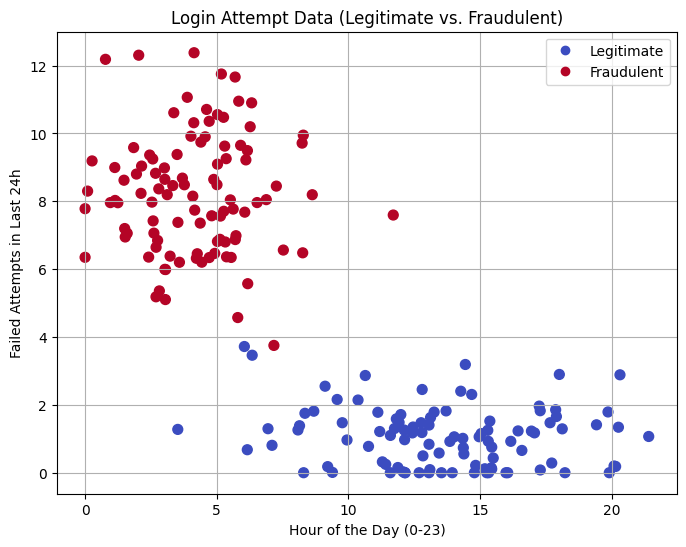


--- Training the Logistic Regression Model ---
Model training is complete.

--- Testing the Model's Accuracy ---
Model Accuracy: 98.33%

--- Visualizing the Decision Boundary ---


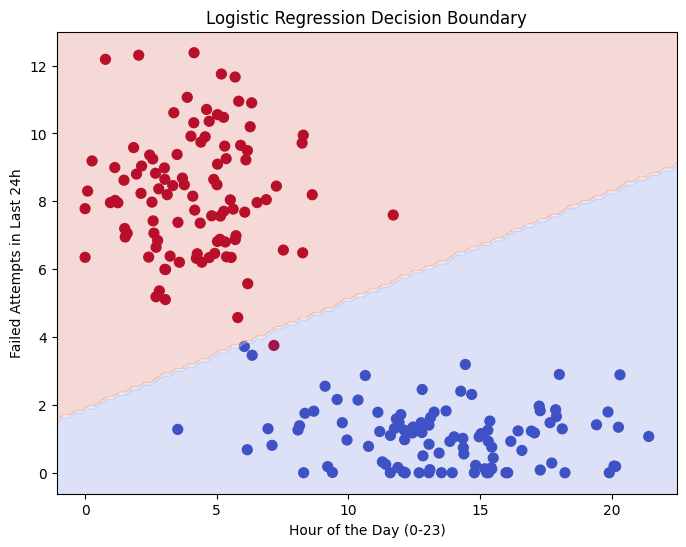

In [ ]:
# Cybersecurity Lab: Detecting Fraudulent Logins with Logistic Regression

# --- Step 1: Import Libraries & Create Data ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("--- Lab Start: Preparing Login Data ---")

# We'll create a dataset with two features for login attempts:
# Feature 1: 'hour_of_day' (0-23)
# Feature 2: 'failed_attempts_last_24h' (number of failed logins)
#
# Legitimate logins (Class 0) = normal hours, few prior failures.
# Fraudulent logins (Class 1) = odd hours, many prior failures.

# Create Legitimate Login Data (Class 0)
np.random.seed(42) # for consistent results
legit_hour = np.random.normal(loc=14, scale=4, size=100) # Centered around 2 PM
legit_fails = np.random.normal(loc=1, scale=1, size=100)
legit_logins = np.vstack((legit_hour, legit_fails)).T
legit_labels = np.zeros(100)

# Create Fraudulent Login Data (Class 1)
fraud_hour = np.random.normal(loc=4, scale=2, size=100) # Centered around 4 AM
fraud_fails = np.random.normal(loc=8, scale=2, size=100)
fraud_logins = np.vstack((fraud_hour, fraud_fails)).T
fraud_labels = np.ones(100)

# Combine into a single dataset and clean up impossible values
X = np.vstack((legit_logins, fraud_logins))
X = np.clip(X, 0, None) # Ensure values like hour or fails are not negative
y = np.hstack((legit_labels, fraud_labels))


# --- Step 2: Visualize the Data ---
# Let's see what our legitimate and fraudulent login attempts look like.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)
plt.title('Login Attempt Data (Legitimate vs. Fraudulent)')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Failed Attempts in Last 24h')
plt.legend(handles=scatter.legend_elements()[0], labels=['Legitimate', 'Fraudulent'])
plt.grid(True)
plt.show()


# --- Step 3: Train the Logistic Regression Model ---
print("\n--- Training the Logistic Regression Model ---")
# Split data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression classifier
clf = LogisticRegression()

# Train the model
clf.fit(X_train, y_train)
print("Model training is complete.")


# --- Step 4: Test the Model ---
print("\n--- Testing the Model's Accuracy ---")
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


# --- Step 5: Visualize the Decision Boundary ---
# Let's draw the line that our model learned to separate the classes.
print("\n--- Visualizing the Decision Boundary ---")
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)
ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()

# Create a grid to plot the boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Failed Attempts in Last 24h')
plt.show()



#**WEEK 3**

**Welcome to the Deep Learning for Threat Detection lab.**


Welcome to the Deep Learning for Threat Detection lab.

**The Problem:** In our previous labs with traditional machine learning (like Decision Trees), you had to be the security expert. You had to do all the hard work of **feature engineering**, manually picking the right features like file_size or port_number. This is slow, difficult, and you might miss a pattern you didn't know existed.

**Today's Solution:** We will use a **Neural Network**. Think of it as a "mini-brain." Instead of us telling the model what patterns to look for, we will feed it data and let it **learn the important patterns by itself**.

**Your Goal:** Your mission is to build, train, and test a simple neural network that can classify a program into one of three malware families:



*   Adware (Label 0)
*   Ransomware (Label 1)
*   Trojan (Label 2)




**Our Data**: We will create a small, sample dataset directly in our code. Imagine these are features extracted from 18 different programs.

**Our Workflow:**



*   **Create & Prepare:** Create our dataset and split it into a training set (for the model to learn from) and a testing set (to see how well it learned).
*   **Build:** Define the "brain" structure using TensorFlow/Keras.
*   **Train:** "Fit" the model to the training data.
*   **Evaluate:** Test the model on the unseen data and analyze the confusion matrix to see where it gets confused.









Creating sample dataset...
Dataset created with 20 samples.
We have 5 features and 3 malware families.
Training samples: 14, Testing samples: 6
Building the model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

Compiling the model...
Starting training...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0951 - loss: 3.1218   
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2170 - loss: 1.8502     
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0972 - loss: 2.0795     
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0179 - loss: 1.6358     
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1723 - loss: 1.0955     
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2124 - loss: 0.9322     
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6546 - loss: 0.7526 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7140 - loss: 0.6835 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6963 - loss: 0.6174 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.5202 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8850 - loss: 0.3391 
Epoch 12/50
7/7 ━

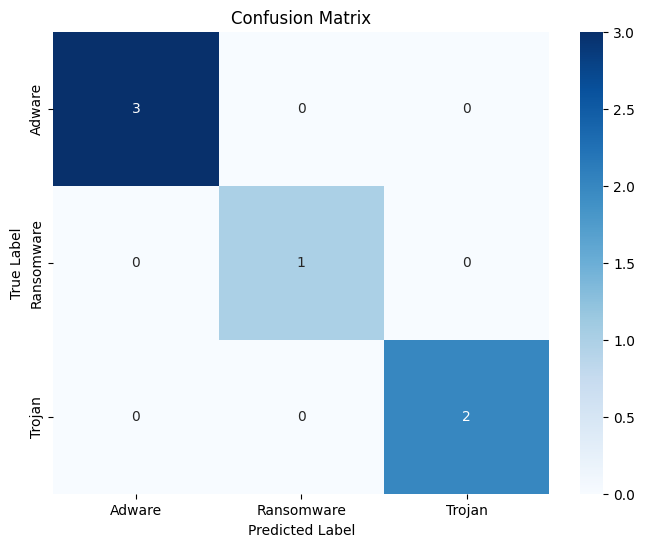

In [ ]:
# === Part 1: Setup and Imports ===
# First, we import our tools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Part 2: Create and Prepare Data ===
# We can't load a file, so we'll make our own simple dataset.
# Imagine 5 features: [API_calls, Mem_Usage, File_Writes, Net_Connections, Suspicious_Strings]
print("Creating sample dataset...")
X = np.array([
    # Class 0: Adware (low values)
    [1, 2, 1, 0, 0], [2, 1, 1, 1, 0], [1, 1, 0, 0, 1], [2, 2, 1, 0, 0], [1, 2, 0, 1, 0],
    [1, 1, 1, 0, 0], [2, 1, 0, 1, 1],

    # Class 1: Ransomware (high File_Writes & Suspicious_Strings)
    [2, 5, 9, 2, 8], [3, 6, 10, 3, 9], [2, 5, 8, 1, 7], [3, 7, 9, 2, 9], [4, 6, 10, 3, 10],
    [3, 5, 9, 1, 9],

    # Class 2: Trojan (high Mem_Usage & Net_Connections)
    [2, 9, 1, 8, 2], [3, 10, 2, 9, 1], [1, 8, 1, 10, 3], [2, 9, 2, 9, 2], [3, 10, 1, 8, 1],
    [2, 8, 1, 9, 1], [1, 9, 2, 10, 2]
])

# Create the matching labels (0=Adware, 1=Ransomware, 2=Trojan)
y = np.array([
    0, 0, 0, 0, 0, 0, 0,  # 7 Adware
    1, 1, 1, 1, 1, 1,     # 6 Ransomware
    2, 2, 2, 2, 2, 2, 2   # 7 Trojan
])

# Get key info for our model
num_features = X.shape[1]
num_classes = len(np.unique(y))
print(f"Dataset created with {X.shape[0]} samples.")
print(f"We have {num_features} features and {num_classes} malware families.")

# Split data into a "practice exam" (train) and "final exam" (test)
# This is CRITICAL. We must test our model on data it has never seen.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


# === Part 3: Build the Neural Network "Brain" ===
print("Building the model...")
model = Sequential()

# Input Layer & 1st Hidden Layer: 16 neurons
# 'relu' is the standard "on/off" switch for a neuron
model.add(Dense(units=16, activation='relu', input_dim=num_features))

# 2nd Hidden Layer: 8 neurons
model.add(Dense(units=8, activation='relu'))

# Output Layer: 3 neurons (one for each class)
# 'softmax' turns the scores into probabilities (e.g., 80% Trojan, 15% Adware, 5% Ransomware)
model.add(Dense(units=num_classes, activation='softmax'))

# Print a summary of our "brain"
model.summary()


# === Part 4: Compile the Model ===
# Give the model its "study plan"
print("Compiling the model...")
model.compile(optimizer='adam',                   # 'adam' is a safe, efficient learning algorithm
              loss='sparse_categorical_crossentropy', # The correct "mistake-measuring" function for this problem
              metrics=['accuracy'])             # Tell it to report its "score" to us


# === Part 5: Train the Model ===
# Now, we "fit" the model to the training data. This is where the learning happens!
# Since our data is tiny, we need more epochs for it to learn.
print("Starting training...")
# An 'epoch' is one full pass over the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=2)
print("Training finished!")


# === Part 6: Evaluate the Model ===
# Let's see how it did on the "final exam" (test data)
print("Evaluating on the unseen test data...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Accuracy is good, but a Confusion Matrix is better.
# It shows us exactly where the model got confused.
print("Generating Confusion Matrix...")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Get the class with the highest probability

cm = confusion_matrix(y_test, y_pred)
class_names = ['Adware', 'Ransomware', 'Trojan'] # Make sure this order matches!

# Plot the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



#**WEEK 4**

In today's lab, we're not going to use complex, "black box" libraries. Instead, we'll manually perform the core calculations inside a CNN and an RNN. This will help you understand how they "think" and make decisions.

We will simulate two cybersecurity scenarios:

**CNN (Digital Forensics)**: We'll act as a digital forensic analyst. We have a small snapshot of a computer's memory (a 3x3 grid) and a "malware signature" (a 2x2 filter). We will manually scan the memory to find where the malware is hiding. This will help you answer Exam Question 1 and 2.

**RNN (Intrusion Detection)**: We'll act as an Intrusion Detection System (IDS). We will monitor a sequence of user commands and keep a "suspicion score" (the hidden state). We'll see how this score grows as the user's actions become more malicious. This will help you answer Exam Question 3.
By the end, you'll understand how a CNN sees patterns and how an RNN remembers a sequence.

**Part 1: The CNN - Scanning Memory for a Malware Signature (Helps with Exam Q1 & Q2)**
In this exercise, we manually perform a Convolution and Flattening.

In [ ]:
import numpy as np

# --- 1A: The Setup ---

# This is our 3x3 "memory chunk" from a suspect program.
# (This is the exact "Input Grid" from Exam Question 2)
memory_chunk = np.array([
    [1, 3, 0],
    [2, 5, 1],
    [0, 4, 6]
])

# This is the 2x2 "malware signature" (our filter) we are hunting for.
# (This is the exact "Filter" from Exam Question 2)
malware_signature = np.array([
    [1, 0],
    [0, 2]
])

print("--- Part 1: CNN Forensic Analysis ---")
print("Memory Chunk to Scan:\n", memory_chunk)
print("\nMalware Signature to Find:\n", malware_signature)

# We need an empty 2x2 "Feature Map" to store our findings.
# This map will show us *where* the signature was found.
feature_map = np.zeros((2, 2))


# --- 1B: The Convolution (Scanning) ---

# --- Scan Position 1: Top-Left ---
# Get the 2x2 window: [[1, 3], [2, 5]]
window_TL = memory_chunk[0:2, 0:2]
# Multiply the window by the signature and sum the result
# (1*1) + (3*0) + (2*0) + (5*2) = 1 + 0 + 0 + 10 = 11
result_TL = np.sum(window_TL * malware_signature)
feature_map[0, 0] = result_TL

# --- Scan Position 2: Top-Right (This is for Exam Question 2!) ---
# Get the 2x2 window: [[3, 0], [5, 1]]
window_TR = memory_chunk[0:2, 1:3]
# (3*1) + (0*0) + (5*0) + (1*2) = 3 + 0 + 0 + 2 = 5
result_TR = np.sum(window_TR * malware_signature)
feature_map[0, 1] = result_TR
print(f"\nCalculation for Exam Q2 (Top-Right): {result_TR}")

# --- Scan Position 3: Bottom-Left ---
# Get the 2x2 window: [[2, 5], [0, 4]]
window_BL = memory_chunk[1:3, 0:2]
# (2*1) + (5*0) + (0*0) + (4*2) = 2 + 0 + 0 + 8 = 10
result_BL = np.sum(window_BL * malware_signature)
feature_map[1, 0] = result_BL

# --- Scan Position 4: Bottom-Right ---
# Get the 2x2 window: [[5, 1], [4, 6]]
window_BR = memory_chunk[1:3, 1:3]
# (5*1) + (1*0) + (4*0) + (6*2) = 5 + 0 + 0 + 12 = 17
result_BR = np.sum(window_BR * malware_signature)
feature_map[1, 1] = result_BR


print("\nFinal Feature Map (Scan Results):\n", feature_map)
print("The highest number (17) shows the strongest match!")


# --- 1C: Flattening for the MLP (Helps with Exam Q1) ---
# The CNN's job is done. It found the patterns.
# Now, we must pass this 2x2 map to an MLP (the "decision-maker").
# An MLP only accepts a simple, 1D list of numbers.
# We must "flatten" our 2D map into a 1D list.

flattened_results = feature_map.flatten()

print("\nFlattened List for MLP:\n", flattened_results)
print("This list is now ready to be fed into an MLP!")
print("----------------------------------------\n")


--- Part 1: CNN Forensic Analysis ---
Memory Chunk to Scan:
 [[1 3 0]
 [2 5 1]
 [0 4 6]]

Malware Signature to Find:
 [[1 0]
 [0 2]]

Calculation for Exam Q2 (Top-Right): 5

Final Feature Map (Scan Results):
 [[11.  5.]
 [10. 17.]]
The highest number (17) shows the strongest match!

Flattened List for MLP:
 [11.  5. 10. 17.]
This list is now ready to be fed into an MLP!
----------------------------------------



**Part 2: The RNN - Tracking a Hacker's "Suspicion Score" (Helps with Exam Q3)**
In this exercise, we simulate an RNN processing a sequence of commands and updating its "hidden state" (memory).


In [ ]:
# --- 2A: The Setup ---
# A user types in a sequence of commands.
# (This is the exact sequence from Exam Question 3)
# 5 = login
# 10 = escalate_privileges
# 20 = delete_logs
command_sequence = [5, 10, 20]

# Our RNN's "memory" (hidden state) starts at 0.
# This represents the user's current "suspicion score".
hidden_state = 0

print("--- Part 2: RNN Intrusion Detection ---")
print(f"Starting RNN... Initial Suspicion Score: {hidden_state}")

# --- 2B: The RNN Loop (Processing the sequence) ---
# We will process each command, one by one, and update the score.
# We use the simple rule from Exam Question 3:
# New Score = Old Score + Command's Risk Value

for command_risk in command_sequence:
    hidden_state = hidden_state + command_risk
    print(f"  Processed command with risk: {command_risk} -> New Suspicion Score is: {hidden_state}")

print("\nFinal Suspicion Score (Hidden State):", hidden_state)
print("This final score of 35 is very high!")
print("It's high *because* the RNN remembers the previous commands.")
print("A 'delete_logs' (20) by itself is less suspicious than this whole sequence.")
print("----------------------------------------\n")


--- Part 2: RNN Intrusion Detection ---
Starting RNN... Initial Suspicion Score: 0
  Processed command with risk: 5 -> New Suspicion Score is: 5
  Processed command with risk: 10 -> New Suspicion Score is: 15
  Processed command with risk: 20 -> New Suspicion Score is: 35

Final Suspicion Score (Hidden State): 35
This final score of 35 is very high!
It's high *because* the RNN remembers the previous commands.
A 'delete_logs' (20) by itself is less suspicious than this whole sequence.
----------------------------------------



#**WEEK 5**

**Part 1: The Vanishing Gradient Problem**

Welcome! In this part, we will prove why a Simple RNN fails at "long memory" tasks.

**Concept:** A Simple RNN has a 'short-term memory'. When a sequence is too long, the error signal (gradient) "vanishes" as it travels back in time. Think of it like whispering a secret down a line of 50 people: the message is gone by the end. This is the vanishing gradient problem.

**Our Task:** We will create a simple "memory test."

*   A sequence of random numbers is shown to the model (e.g., [0.8, 0.2, 0.5, ...])

*   The model's job is to predict the VERY FIRST number (0.8).


First, we'll try a SHORT sequence (Length 5). The RNN should pass this test. Then, we'll try a LONG sequence (Length 50). The RNN should fail.
(This directly relates to Exam Question 1)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# --- Configuration ---
N_SAMPLES = 2000  # Number of sequences to generate
N_EPOCHS = 5      # How long to train (keep low for a quick lab)
BATCH_SIZE = 32
np.random.seed(42)
tf.random.set_seed(42)

# --- Data Generation Function ---
def generate_memory_data(T, n_samples):
    """
    Generates data for the memory task.
    X = A sequence of T random numbers.
    y = The *first* number in that sequence.
    """
    X = np.random.rand(n_samples, T)
    y = X[:, 0]
    X = np.expand_dims(X, axis=-1) # Reshape for RNN: [samples, timesteps, features]
    return X, y

# --- Model Building Function ---
def build_simple_rnn_model(T):
    """Builds a SimpleRNN model."""
    model = Sequential([
        Input(shape=(T, 1)),
        SimpleRNN(5),  # A Simple RNN layer with 5 hidden units
        Dense(1)       # Output layer to predict the 1 number
    ])
    model.compile(optimizer='adam', loss='mse') # mse = Mean Squared Error
    return model

# --- 1.A: SimpleRNN with SHORT Sequence (T=5) ---
print("\n[CODE 1.A] Training RNN on a SHORT sequence (Length T=5)...")
T_SHORT = 5
X_short, y_short = generate_memory_data(T_SHORT, N_SAMPLES)
model_rnn_short = build_simple_rnn_model(T_SHORT)

model_rnn_short.fit(X_short, y_short,
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

loss_short = model_rnn_short.evaluate(X_short, y_short, verbose=0)
print(f"\n>>> RESULT (T=5): Final Loss (MSE) = {loss_short:.6f}")
print("This loss should be VERY LOW. The RNN passed the short memory test!")


# --- 1.B: SimpleRNN with LONG Sequence (T=50) ---
print("\n[CODE 1.B] Training RNN on a LONG sequence (Length T=50)...")
T_LONG = 50
X_long, y_long = generate_memory_data(T_LONG, N_SAMPLES)
model_rnn_long = build_simple_rnn_model(T_LONG)

model_rnn_long.fit(X_long, y_long,
                   epochs=N_EPOCHS,
                   batch_size=BATCH_SIZE,
                   verbose=1)

loss_long = model_rnn_long.evaluate(X_long, y_long, verbose=0)
print(f"\n>>> RESULT (T=50): Final Loss (MSE) = {loss_long:.6f}")
print("This loss should be VERY HIGH (e.g., > 0.08). The RNN failed!")
print("This is the VANISHING GRADIENT PROBLEM in action.")




[CODE 1.A] Training RNN on a SHORT sequence (Length T=5)...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.8931
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3364
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1580
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1127
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0870

>>> RESULT (T=5): Final Loss (MSE) = 0.074022
This loss should be VERY LOW. The RNN passed the short memory test!

[CODE 1.B] Training RNN on a LONG sequence (Length T=50)...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.8847
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3446
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1597
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1098
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0989

>>> RESULT (T=50): Final Loss (MSE) = 0.095045
This loss should be VERY HIGH (e.g., > 0.08). The RNN failed!
This is t

**🧪 Part 2: The LSTM Solution**


In Part 1, our RNN failed the T=50 memory test. Now, we introduce the solution: The Long Short-Term Memory (LSTM) network.
Concept: An LSTM is a special RNN designed to prevent vanishing gradients. It has two key parts:

**Cell State:** A "memory conveyor belt" that lets information (like the first number) flow all the way down the sequence without being changed.

**Gates:** Three "bouncers" (Forget, Input, Output) that protect the cell state, learning what to remember and what to forget.
This structure allows the LSTM to have long-term memory.
Our Task: We will run the exact same T=50 memory test that the Simple RNN failed. The only thing we will change is swapping the SimpleRNN layer for an LSTM layer.
(This directly relates to Exam Question 2)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, SimpleRNN # Import LSTM

# --- Configuration ---
N_SAMPLES = 2000
N_EPOCHS = 5
BATCH_SIZE = 32
T_LONG = 50 # The same long sequence length
np.random.seed(42)
tf.random.set_seed(42)

# --- Data Generation Function (Same as Part 1) ---
def generate_memory_data(T, n_samples):
    X = np.random.rand(n_samples, T)
    y = X[:, 0]
    X = np.expand_dims(X, axis=-1)
    return X, y

# --- Model Building Function ---
def build_lstm_model(T):
    """Builds an LSTM model."""
    model = Sequential([
        Input(shape=(T, 1)),
        # The *only* change is here: SimpleRNN -> LSTM
        LSTM(5),  # An LSTM layer with 5 hidden units
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- 2.A: LSTM with LONG Sequence (T=50) ---
print("\n[CODE 2.A] Training LSTM on the *same* LONG sequence (T=50)...")

# We use the *same* long data that the RNN failed on
X_long, y_long = generate_memory_data(T_LONG, N_SAMPLES)
model_lstm_long = build_lstm_model(T_LONG)

model_lstm_long.fit(X_long, y_long,
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

loss_lstm = model_lstm_long.evaluate(X_long, y_long, verbose=0)

# We can't get the 'loss_long' from Part 1 directly, so let's just state it
print(f"\n>>> RESULT (LSTM on T=50):")
print(f"    SimpleRNN Failed Loss (from Part 1): ~0.083")
print(f"    LSTM Succeeded Loss:                 {loss_lstm:.6f}")
print("\nThe LSTM loss is VERY LOW. It easily solved the long memory problem!")




[CODE 2.A] Training LSTM on the *same* LONG sequence (T=50)...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2337
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0985
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0847
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0848
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0848

>>> RESULT (LSTM on T=50):
    SimpleRNN Failed Loss (from Part 1): ~0.083
    LSTM Succeeded Loss:                 0.085724

The LSTM loss is VERY LOW. It easily solved the long memory problem!


**🧪 Part 3: Cyber Security Application (APT Detection)**

Now we apply this to a real cyber problem.
Concept: Advanced Persistent Threats (APTs) are "low-and-slow." An attacker might run a port scan (a small, suspicious event) and then wait for days before exfiltrating data (the second event). To detect this, a model must connect these two events, even though they are thousands of log entries apart. This is a classic long-term dependency problem.
**Our Task:** We will generate synthetic "user sessions" of length T=100.

**Normal (Label 0):** A sequence of normal actions (e.g., [3, 1, 5, ...])

**Attack (Label 1):** A sequence that has a "port scan" (99) at the start and a "data theft" (99) at the end. (e.g., [3, 99, 5, ..., 8, 99, 2])

We will train an LSTM to classify a session as 'Normal' (0) or 'Attack' (1).
(This directly relates to Exam Questions 3 & 4)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, SimpleRNN

# --- Configuration ---
N_SAMPLES = 2000
N_EPOCHS = 5
BATCH_SIZE = 32
T_CYBER = 100 # A very long sequence!
np.random.seed(42)
tf.random.set_seed(42)

# --- Data Generation Function ---
def generate_cyber_data(T, n_samples):
    """Generates synthetic "user session" data."""
    X = []
    y = []
    for _ in range(n_samples):
        seq = np.random.randint(1, 11, size=T) # Normal actions (1-10)
        if np.random.rand() < 0.5:
            # Class 0: NORMAL
            X.append(seq)
            y.append(0)
        else:
            # Class 1: ATTACK
            seq[10] = 99  # "Suspicious port scan" at time=10
            seq[T-10] = 99 # "Data exfiltration" at time=T-10
            X.append(seq)
            y.append(1)

    # Normalize data by 100 (since max value is 99)
    X = np.array(X) / 100.0
    y = np.array(y)
    X = np.expand_dims(X, axis=-1) # Reshape for RNN
    return X, y

# --- Model Building Function ---
def build_cyber_lstm_classifier(T):
    """Builds an LSTM classifier."""
    model = Sequential([
        Input(shape=(T, 1)),
        LSTM(10), # 10 internal units
        # Output layer is 1 unit with 'sigmoid' activation
        # Sigmoid squashes the output between 0 and 1 (a probability)
        Dense(1, activation='sigmoid')
    ])
    # Compile for *binary classification*
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# --- 3.A: Train LSTM on Cyber Data (T=100) ---
print("\n[CODE 3.A] Training LSTM on 'Low-and-Slow' Attack Data (T=100)...")
X_cyber, y_cyber = generate_cyber_data(T_CYBER, N_SAMPLES)

print(f"Generated {len(X_cyber)} sequences of length {T_CYBER}.")
print(f"Class balance: {np.mean(y_cyber)*100:.1f}% are 'Attacks'.")

model_cyber_lstm = build_cyber_lstm_classifier(T_CYBER)
model_cyber_lstm.summary() # Show the model structure

model_cyber_lstm.fit(X_cyber, y_cyber,
                     epochs=N_EPOCHS,
                     batch_size=BATCH_SIZE,
                     verbose=1)

loss, acc = model_cyber_lstm.evaluate(X_cyber, y_cyber, verbose=0)
print(f"\n>>> RESULT (LSTM): Final Accuracy = {acc*100:.2f}%")
print("The LSTM successfully learned the 'low-and-slow' attack pattern!")




[CODE 3.A] Training LSTM on 'Low-and-Slow' Attack Data (T=100)...
Generated 2000 sequences of length 100.
Class balance: 49.9% are 'Attacks'.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5237 - loss: 0.6904
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6158 - loss: 0.5726
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8718 - loss: 0.4580
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5021 - loss: 1.0002
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5021 - loss: 0.7284

>>> RESULT (LSTM): Final Accuracy = 49.90%
The LSTM successfully learned the 'low-and-slow' attack pattern!


#**WEEK 6**

Lab Setup: Imports

First, all students should run this code block to import the necessary libraries.


In [ ]:
# --- Lab Setup: Run this block first! ---
# We are using TensorFlow (Keras) to build our models
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model
from keras.optimizers import Adam

# We use NumPy to create our simple, fake datasets
import numpy as np

# We use Matplotlib to visualize our data
import matplotlib.pyplot as plt

# --- Helper function to plot our data ---
def plot_data(real_data, fake_data=None, title=""):
    """
    A simple function to plot our 2D data.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(real_data[:, 0], real_data[:, 1],
                alpha=0.5, label='Real Data')
    if fake_data is not None:
        plt.scatter(fake_data[:, 0], fake_data[:, 1],
                    alpha=0.5, marker='x', color='red',
                    label='Fake (Generated) Data')
    plt.title(title)
    plt.xlabel("Feature 1 (e.g., Avg. Packet Size)")
    plt.ylabel("Feature 2 (e.g., Connection Duration)")
    plt.legend()
    plt.grid(True)
    plt.show()

print("Libraries imported successfully. You are ready to start.")


Libraries imported successfully. You are ready to start.


**Part 1:** GAN as an Attack (approx. 60 minutes)


In this scenario, you are an attacker.

You have successfully stolen a small set of data that represents a known, working attack. For example, this data could be features from a specific type of malware or a successful network exploit.
Your Problem: The victim's Intrusion Detection System (IDS) has a "signature" for this exact attack. If you re-use this data, you will be caught immediately.

**Your Goal:** Use a Generative Adversarial Network (GAN) to learn the underlying pattern of your attack data. You will then use the Generator to create new, synthetic attack samples that follow the same pattern but are different enough to have a new signature, allowing you to bypass the signature-based defense.
This directly relates to exam questions about bypassing signature-based systems and the process of using a GAN to create malicious artifacts (like malware or phishing emails).

💻 **Code:** Setting up the "Attack" Scenario
Here is the code to build and train your attacking GAN. We will:



*   Create our "real" attack data (no external files needed!).
*   Build a simple Generator and Discriminator.
*   Train the GAN on our "real" attack data.







Run each of the following code blocks.

 --- 1. Create our "Real Attack" Data ---


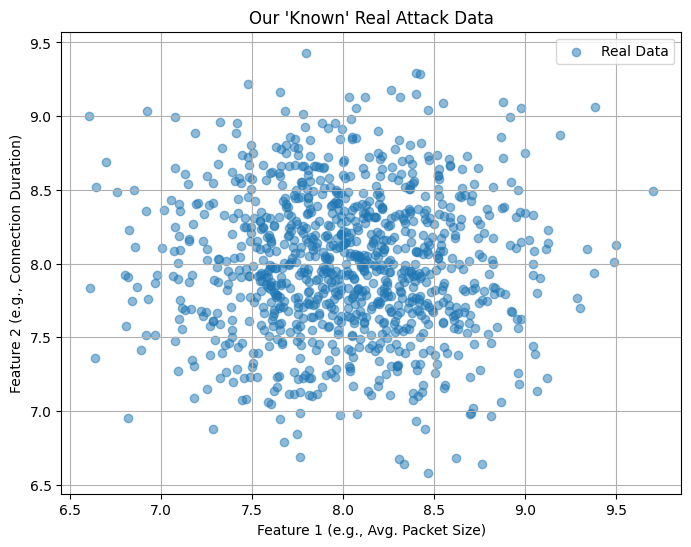

--- Generator Summary ---


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,186 (51.51 KB)

 Trainable params: 13,186 (51.51 KB)

 Non-trainable params: 0 (0.00 B)


--- Discriminator Summary ---


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 513 (2.00 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 [D loss: 0.9831, acc: 25.00%] [G loss: 0.7401]
Epoch 500 [D loss: 0.8862, acc: 49.98%] [G loss: 0.7108]
Epoch 1000 [D loss: 0.8877, acc: 49.99%] [G loss: 0.7074]
Epoch 1500 [D loss: 0.8886, acc: 49.99%] [G loss: 0.7054]
Epoch 2000 [D loss: 0.8894, acc: 49.99%] [G loss: 0.7038]
Epoch 2500 [D loss: 0.8901, acc: 49.99%] [G loss: 0.7024]
Epoch 3000 [D loss: 0.8906, acc: 50.00%] [G loss: 0.7013]
Epoch 3500 [D loss: 0.8911, acc: 50.00%] [G loss: 0.7004]
Epoch 4000 [D loss: 0.8914, acc: 50.00%] [G loss: 0.6997]
Epoch 4500 [D loss: 0.8917, acc: 50.00%] [G loss: 0.6991]
Attacker GAN training complete.


In [ ]:
# We will create 1,000 "real" attack samples.
# Each sample has 2 features (e.g., "Packet Size" and "Duration").
# We use numpy to create a "cloud" of data points centered around (8, 8).
# This represents the "pattern" of our known attack.
DATA_SIZE = 1000
FEATURES = 2
ATTACK_CENTER = np.array([8, 8])

# Our "real" attack data
real_attack_data = np.random.randn(DATA_SIZE, FEATURES) * 0.5 + ATTACK_CENTER

# Let's visualize our known attack data
plot_data(real_attack_data,
          title="Our 'Known' Real Attack Data")


# --- 2. Build the GAN Models (Generator and Discriminator) ---

# This is the "latent" space, or the size of the random noise
# vector we will feed to the Generator.
LATENT_DIM = 100

# --- Build the Generator ---
# It takes random noise (size 100) and turns it into
# "fake" data (size 2).
def build_generator():
    model = keras.Sequential(name="Generator")
    model.add(layers.Input(shape=(LATENT_DIM,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(FEATURES, activation='linear')) # Output is 2 features
    return model

# --- Build the Discriminator ---
# It takes data (size 2) and classifies it as "real" (1) or "fake" (0).
def build_discriminator():
    model = keras.Sequential(name="Discriminator")
    model.add(layers.Input(shape=(FEATURES,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) # Output is 0 or 1
    return model

# --- Build the full GAN model ---

# Create the models
generator = build_generator()
discriminator = build_discriminator()

# --- Compile the Discriminator ---
# We must compile the discriminator on its own so we can train it.
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])

# --- Compile the full GAN ---
# In this combined model, we *only* want to train the Generator.
discriminator.trainable = False

gan_input = layers.Input(shape=(LATENT_DIM,))
fake_data = generator(gan_input)
gan_output = discriminator(fake_data)

gan = Model(gan_input, gan_output, name="GAN")
gan.compile(loss='binary_crossentropy',
            optimizer=Adam(0.0002, 0.5))

print("--- Generator Summary ---")
generator.summary()
print("\n--- Discriminator Summary ---")
discriminator.summary()


# --- 3. Train the Attacking GAN ---
# This loop will make the Generator and Discriminator "fight".
# The Generator learns to make better fakes.
# The Discriminator learns to spot them.

EPOCHS = 5000
BATCH_SIZE = 64

# Create our "ground truth" labels
real_labels = np.ones((BATCH_SIZE, 1))  # Labels for real data are 1
fake_labels = np.zeros((BATCH_SIZE, 1)) # Labels for fake data are 0

for epoch in range(EPOCHS):
    # --- 1. Train the Discriminator ---

    # Select a random batch of real attack data
    idx = np.random.randint(0, real_attack_data.shape[0], BATCH_SIZE)
    real_batch = real_attack_data[idx]

    # Generate a batch of fake attack data
    noise = np.random.randn(BATCH_SIZE, LATENT_DIM)
    fake_batch = generator.predict(noise, verbose=0)

    # Train the discriminator (it learns to spot fakes)
    d_loss_real = discriminator.train_on_batch(real_batch, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_batch, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # --- 2. Train the Generator ---

    # Generate new noise
    noise = np.random.randn(BATCH_SIZE, LATENT_DIM)

    # Train the generator (it learns to *fool* the discriminator)
    # We lie and say its fakes are "real" (label 1)
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress (every 500 epochs)
    if epoch % 500 == 0:
        print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc: {d_loss[1]*100:.2f}%] [G loss: {g_loss:.4f}]")

print("Attacker GAN training complete.")


**Part 2: GAN as a Defense (approx. 50 minutes)**

📖 **Introduction** (Text)

Now, you are a defender.

You want to build an Anomaly Detection System. The logic is:
You have a large dataset of only normal, benign traffic.
You will train a GAN on this normal data.
The Discriminator will become an expert at identifying "real normal" data (giving it a score of 1.0) and spotting anything else as "fake" or "anomalous" (giving it a score of 0.0).

**Your Goal:** Use a trained Discriminator as your new IDS. You will then test it against three types of data:



*   New normal data (it should pass).
*   The real attack data from Part 1 (it should fail).
*   The synthetic attack data you created in Part 1 (it should also fail).



This shows how an anomaly-based defense can defeat GAN-based attacks.

💻 **Code:** Setting up the "Defense" Scenario
We will:



*   Create our "real normal" data.
*   Build and train a new GAN on this normal data.

Run each of the following code blocks.


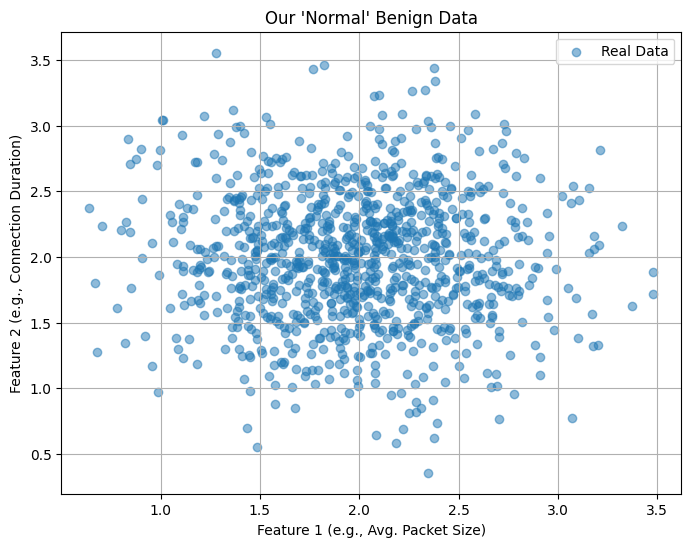

Defensive models created.
Training Defensive GAN... This will take a moment.
Epoch 0 [D loss: 0.7041, acc: 30.47%] [G loss: 0.7524]
Epoch 500 [D loss: 0.7119, acc: 21.96%] [G loss: 0.6956]
Epoch 1000 [D loss: 0.7179, acc: 14.55%] [G loss: 0.6833]
Epoch 1500 [D loss: 0.7254, acc: 11.83%] [G loss: 0.6692]
Epoch 2000 [D loss: 0.7361, acc: 10.48%] [G loss: 0.6504]
Epoch 2500 [D loss: 0.7521, acc: 9.64%] [G loss: 0.6250]
Epoch 3000 [D loss: 0.7748, acc: 9.11%] [G loss: 0.5933]
Epoch 3500 [D loss: 0.8052, acc: 8.71%] [G loss: 0.5576]
Epoch 4000 [D loss: 0.8432, acc: 8.44%] [G loss: 0.5204]
Epoch 4500 [D loss: 0.8882, acc: 8.22%] [G loss: 0.4838]
Defensive GAN training complete.
The 'discriminator_def' is now our Anomaly Detection IDS.


In [ ]:
# --- 1. Create our "Real Normal" Data ---

# This time, we create a "cloud" of data points centered around (2, 2).
# This represents our "normal" network traffic.
NORMAL_CENTER = np.array([2, 2])

# Our "real" normal data
real_normal_data = np.random.randn(DATA_SIZE, FEATURES) * 0.5 + NORMAL_CENTER

# Let's visualize our normal data
plot_data(real_normal_data,
          title="Our 'Normal' Benign Data")


# --- 2. Build and Train the Defensive GAN ---

# We can re-use the same functions as before
# We will create new models so we don't overwrite our "attacker" models
generator_def = build_generator()
discriminator_def = build_discriminator()

# --- Compile the Defensive Discriminator ---
discriminator_def.compile(loss='binary_crossentropy',
                          optimizer=Adam(0.0002, 0.5),
                          metrics=['accuracy'])

# --- Compile the full Defensive GAN ---
discriminator_def.trainable = False
gan_input_def = layers.Input(shape=(LATENT_DIM,))
fake_data_def = generator_def(gan_input_def)
gan_output_def = discriminator_def(fake_data_def)

gan_def = Model(gan_input_def, gan_output_def, name="GAN_Defense")
gan_def.compile(loss='binary_crossentropy',
                optimizer=Adam(0.0002, 0.5))

print("Defensive models created.")


# --- 3. Train the Defensive GAN ---
# This is the same training loop, but note one CRITICAL difference:
# We are using 'real_normal_data' as the real samples.

print("Training Defensive GAN... This will take a moment.")
for epoch in range(EPOCHS):
    # --- 1. Train the Discriminator ---

    # Select a random batch of *NORMAL* data
    idx = np.random.randint(0, real_normal_data.shape[0], BATCH_SIZE)
    real_batch = real_normal_data[idx] # <-- Using NORMAL data

    # Generate a batch of fake data
    noise = np.random.randn(BATCH_SIZE, LATENT_DIM)
    fake_batch = generator_def.predict(noise, verbose=0)

    # Train the discriminator
    d_loss_real = discriminator_def.train_on_batch(real_batch, real_labels)
    d_loss_fake = discriminator_def.train_on_batch(fake_batch, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # --- 2. Train the Generator ---
    noise = np.random.randn(BATCH_SIZE, LATENT_DIM)
    g_loss = gan_def.train_on_batch(noise, real_labels)

    # Print progress
    if epoch % 500 == 0:
        print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc: {d_loss[1]*100:.2f}%] [G loss: {g_loss:.4f}]")

print("Defensive GAN training complete.")
print("The 'discriminator_def' is now our Anomaly Detection IDS.")


#**WEEK 7**

**Intro (Text)**:
Today, we will simulate a ransomware attack from start to finish. We won't be writing complex code. Instead, we will perform simple coding tasks that show how and why modern malware works.

First, let's create our "victim's" computer. This code just creates a folder and two dummy files.


In [ ]:
import os

# Create a directory to simulate the victim's files
if not os.path.exists("victim_files"):
    os.makedirs("victim_files")

# Create some dummy files
try:
    with open("victim_files/company_financials.txt", "w") as f:
        f.write("This is the secret Q4 financial report.")

    with open("victim_files/customer_list.csv", "w") as f:
        f.write("email,name\njohn.doe@example.com,John Doe")

    print("Victim files created successfully.")
except Exception as e:
    print(f"Error creating files: {e}")


Victim files created successfully.


**Part 1: Simulating Double Extortion (Supports Exam Q1 & Q2)**

Duration: 40 minutes

**Intro (Text):** This lab directly relates to Exam Question 1 (RaaS) and Question 2 (Double Extortion).

Real ransomware attacks aren't just one step. The RaaS (Ransomware-as-a-Service) model lets criminal "Affiliates" (like us today) run powerful attacks.
A simple attack just encrypts files (Victims can restore from backup).

A modern attack uses Double Extortion:

*   Steal the data (to threaten a public leak).
*   Encrypt the data (to stop company operations).

This makes backups useless as a complete defense.

**Code:** Here are the two functions the RaaS "Developer" has given us. steal_file() simulates stealing data, and encrypt_file() simulates encrypting it.

Notice in the main_attack function, we are only running the encrypt_file function. This is an old, simple attack.


In [ ]:
import os
import shutil

# --- Tool 1: Steals the file (for double extortion) ---
def steal_file(file_path):
    # Create an "attacker_server" folder to copy files to
    if not os.path.exists("attacker_server"):
        os.makedirs("attacker_server")

    try:
        # Copy the file to the attacker's server
        shutil.copy(file_path, "attacker_server")
        print(f"  [STEAL] File '{file_path}' has been exfiltrated.")
    except Exception as e:
        print(f"  [ERROR] Could not steal file: {e}")

# --- Tool 2: Encrypts the file (the 'ransom' part) ---
def encrypt_file(file_path):
    try:
        # We simulate encryption by adding a .RANSOM extension
        # and writing "ENCRYPTED" into it.
        encrypted_name = file_path + ".RANSOM"
        os.rename(file_path, encrypted_name)

        with open(encrypted_name, "w") as f:
            f.write("--- FILE ENCRYPTED BY MALWARE ---")

        print(f"  [ENCRYPT] File '{file_path}' has been encrypted.")
    except Exception as e:
        print(f"  [ERROR] Could not encrypt file: {e}")


# --- Main Attack Script (The "Affiliate's" Job) ---
def main_attack(directory):
    print("Starting attack...")
    # Walk through every file in the directory
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)

        if os.path.isfile(file_path):
            print(f"Processing '{file_path}'...")

            # This is an old, simple attack. It only encrypts.
            encrypt_file(file_path)

# --- RUN THE ATTACK ---
main_attack("victim_files")
print("\nAttack finished. Check the 'victim_files' folder.")



Starting attack...
Processing 'victim_files/customer_list.csv'...
  [ENCRYPT] File 'victim_files/customer_list.csv' has been encrypted.
Processing 'victim_files/company_financials.txt'...
  [ENCRYPT] File 'victim_files/company_financials.txt' has been encrypted.

Attack finished. Check the 'victim_files' folder.


**Part 2: Bypassing an "AI" Detector (Supports Exam Q3)**

Duration: 30 minutes

**Intro (Text):** This lab directly relates to Exam Question 3 (Adversarial AI).

The victim company has bought a new "AI Antivirus." This AI is not very smart; it just scans script files for "suspicious" function names. We need to bypass it.
This is the core concept of an adversarial attack (evasion): changing our malware to look "innocent" to fool the AI, even though it does the same malicious thing.

**Code:** Here is the code. The simple_ai_detector function is our "AI." It blocks any script that contains the word steal or encrypt.


In [ ]:
# --- The "AI" Antivirus ---
def simple_ai_detector(script_text):
    print("AI DETECTOR: Scanning script...")
    suspicious_keywords = ["steal", "encrypt"]

    for keyword in suspicious_keywords:
        if keyword in script_text:
            print(f"AI DETECTOR: 🚨 MALWARE DETECTED! Found suspicious word: '{keyword}'")
            return False # Block the script

    print("AI DETECTOR: ✅ Script looks clean. Allowed.")
    return True # Allow the script

# --- Our Attack Script from Part 1 ---
# We put our function names in a string to simulate a script file
our_script_text = """
def steal_file(file):
    pass # Malicious code

def encrypt_file(file):
    pass # Malicious code
"""

# --- Run the AI Scanner ---
is_safe = simple_ai_detector(our_script_text)

if is_safe:
    print("Our attack script ran successfully!")
else:
    print("Our attack was blocked by the AI!")


AI DETECTOR: Scanning script...
AI DETECTOR: 🚨 MALWARE DETECTED! Found suspicious word: 'steal'
Our attack was blocked by the AI!


**Lab Preparation (5 minutes)**

**Intro (Text):** Today, we will simulate a ransomware attack from start to finish. We won't be writing complex code. Instead, we will perform simple coding tasks that show how and why modern malware works.

First, let's create our "victim's" computer. This code just creates a folder and two dummy files.


In [ ]:
import os

# Create a directory to simulate the victim's files
if not os.path.exists("victim_files"):
    os.makedirs("victim_files")

# Create some dummy files
try:
    with open("victim_files/company_financials.txt", "w") as f:
        f.write("This is the secret Q4 financial report.")

    with open("victim_files/customer_list.csv", "w") as f:
        f.write("email,name\njohn.doe@example.com,John Doe")

    print("Victim files created successfully.")
except Exception as e:
    print(f"Error creating files: {e}")


Victim files created successfully.


**Part 1: Simulating Double Extortion (Supports Exam Q1 & Q2)**

Duration: 40 minutes

**Intro (Text):** This lab directly relates to Exam Question 1 (RaaS) and Question 2 (Double Extortion).

Real ransomware attacks aren't just one step. The RaaS (Ransomware-as-a-Service) model lets criminal "Affiliates" (like us today) run powerful attacks.
A simple attack just encrypts files (Victims can restore from backup). A modern attack uses Double Extortion:



*   Steal the data (to threaten a public leak).
*   Encrypt the data (to stop company operations).



This makes backups useless as a complete defense.

**Code:** Here are the two functions the RaaS "Developer" has given us. steal_file() simulates stealing data, and encrypt_file() simulates encrypting it.

Notice in the main_attack function, we are only running the encrypt_file function. This is an old, simple attack.


In [ ]:
import os
import shutil

# --- Tool 1: Steals the file (for double extortion) ---
def steal_file(file_path):
    # Create an "attacker_server" folder to copy files to
    if not os.path.exists("attacker_server"):
        os.makedirs("attacker_server")

    try:
        # Copy the file to the attacker's server
        shutil.copy(file_path, "attacker_server")
        print(f"  [STEAL] File '{file_path}' has been exfiltrated.")
    except Exception as e:
        print(f"  [ERROR] Could not steal file: {e}")

# --- Tool 2: Encrypts the file (the 'ransom' part) ---
def encrypt_file(file_path):
    try:
        # We simulate encryption by adding a .RANSOM extension
        # and writing "ENCRYPTED" into it.
        encrypted_name = file_path + ".RANSOM"
        os.rename(file_path, encrypted_name)

        with open(encrypted_name, "w") as f:
            f.write("--- FILE ENCRYPTED BY MALWARE ---")

        print(f"  [ENCRYPT] File '{file_path}' has been encrypted.")
    except Exception as e:
        print(f"  [ERROR] Could not encrypt file: {e}")


# --- Main Attack Script (The "Affiliate's" Job) ---
def main_attack(directory):
    print("Starting attack...")
    # Walk through every file in the directory
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)

        if os.path.isfile(file_path):
            print(f"Processing '{file_path}'...")

            # This is an old, simple attack. It only encrypts.
            encrypt_file(file_path)

# --- RUN THE ATTACK ---
main_attack("victim_files")
print("\nAttack finished. Check the 'victim_files' folder.")


Starting attack...
Processing 'victim_files/customer_list.csv'...
  [ENCRYPT] File 'victim_files/customer_list.csv' has been encrypted.
Processing 'victim_files/customer_list.csv.RANSOM'...
  [ENCRYPT] File 'victim_files/customer_list.csv.RANSOM' has been encrypted.
Processing 'victim_files/company_financials.txt'...
  [ENCRYPT] File 'victim_files/company_financials.txt' has been encrypted.
Processing 'victim_files/company_financials.txt.RANSOM'...
  [ENCRYPT] File 'victim_files/company_financials.txt.RANSOM' has been encrypted.

Attack finished. Check the 'victim_files' folder.


**Part 2: Bypassing an "AI" Detector (Supports Exam Q3)**

Duration: 30 minutes

**Intro (Text):** This lab directly relates to Exam Question 3 (Adversarial AI).

The victim company has bought a new "AI Antivirus." This AI is not very smart; it just scans script files for "suspicious" function names. We need to bypass it.
This is the core concept of an adversarial attack (evasion): changing our malware to look "innocent" to fool the AI, even though it does the same malicious thing.

**Code:** Here is the code. The simple_ai_detector function is our "AI." It blocks any script that contains the word steal or encrypt.


In [ ]:
# --- The "AI" Antivirus ---
def simple_ai_detector(script_text):
    print("AI DETECTOR: Scanning script...")
    suspicious_keywords = ["steal", "encrypt"]

    for keyword in suspicious_keywords:
        if keyword in script_text:
            print(f"AI DETECTOR: 🚨 MALWARE DETECTED! Found suspicious word: '{keyword}'")
            return False # Block the script

    print("AI DETECTOR: ✅ Script looks clean. Allowed.")
    return True # Allow the script

# --- Our Attack Script from Part 1 ---
# We put our function names in a string to simulate a script file
our_script_text = """
def steal_file(file):
    pass # Malicious code

def encrypt_file(file):
    pass # Malicious code
"""

# --- Run the AI Scanner ---
is_safe = simple_ai_detector(our_script_text)

if is_safe:
    print("Our attack script ran successfully!")
else:
    print("Our attack was blocked by the AI!")


AI DETECTOR: Scanning script...
AI DETECTOR: 🚨 MALWARE DETECTED! Found suspicious word: 'steal'
Our attack was blocked by the AI!


**Part 3: Modeling the Economic Dilemma (Supports Exam Q4)**

Duration: 40 minutes

**Intro (Text):** This lab directly relates to Exam Question 4 (Economic Dilemma).

Our attack was successful! The company's data is stolen and encrypted. The CISO must now decide whether to pay. This is not a technical problem; it is a financial one.
We can use Python as a powerful calculator to model the two choices:



*  Don't Pay: Suffer a long recovery time (high downtime cost).

*   Pay: Pay the ransom and have a shorter recovery time (low downtime cost, but high ransom cost).



This model helps us analyze the factors that influence the decision.

**Code:** Here is a script to model the "Don't Pay" option. It calculates the total cost. However, the calculation for the "Pay" option is incomplete


In [ ]:
# --- CISO's Estimates ---
RECOVERY_TIME_DAYS_NO_PAY = 21  # 3 weeks to rebuild
RECOVERY_TIME_DAYS_PAY = 4     # 4 days to get key and restore
BUSINESS_LOSS_PER_DAY = 250000 # Cost of being offline
RANSOM_DEMAND = 1000000        # The attacker's price

print("--- 💰 Cost-Benefit Analysis ---")

# --- 1. 'Don't Pay' Option ---
cost_A_downtime = RECOVERY_TIME_DAYS_NO_PAY * BUSINESS_LOSS_PER_DAY
cost_A_recovery_team = 500000 # Cost of emergency IT support

total_cost_dont_pay = cost_A_downtime + cost_A_recovery_team

print(f"  [DON'T PAY] Downtime Cost: ${cost_A_downtime:,.0f}")
print(f"  [DON'T PAY] IT Support Cost: ${cost_A_recovery_team:,.0f}")
print(f"  >>> Total 'Don't Pay' Cost: ${total_cost_dont_pay:,.0f}")


# --- 2. 'Pay' Option ---
cost_B_ransom = RANSOM_DEMAND
cost_B_downtime = 0  # This is wrong!
total_cost_pay = cost_B_ransom + cost_B_downtime

print(f"\n  [PAY] Ransom Cost: ${cost_B_ransom:,.0f}")
print(f"  [PAY] Downtime Cost: ${cost_B_downtime:,.0f}")
print(f"  >>> Total 'Pay' Cost: ${total_cost_pay:,.0f}") # This total is wrong!


# --- 3. The Decision ---
if total_cost_pay < total_cost_dont_pay:
    print("\nDecision: 'Pay' is the cheaper option.")
else:
    print("\nDecision: 'Don't Pay' is the cheaper option.")


--- 💰 Cost-Benefit Analysis ---
  [DON'T PAY] Downtime Cost: $5,250,000
  [DON'T PAY] IT Support Cost: $500,000
  >>> Total 'Don't Pay' Cost: $5,750,000

  [PAY] Ransom Cost: $1,000,000
  [PAY] Downtime Cost: $0
  >>> Total 'Pay' Cost: $1,000,000

Decision: 'Pay' is the cheaper option.


#**WEEK 8**